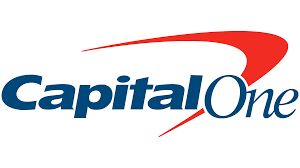

# Airline  Data Challenge             

### Before running the notebook Install all the libraries required on local computer  using ! pip using library name


Order followed:
1.	Performed the Data Analysis individually for Airport codes, Flights and Tickets dataset.
2.	Merged all the datasets into one using selected columns.
3.	Performing the Visualizations for given tasks to identify the insights.



### importing libraries required

In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats
import missingno as msno
%matplotlib inline

In [2]:
# getting current working directory
os.getcwd()

'C:\\Users\\nvgsiva sai\\Downloads'

In [3]:
#Check the file where it is located.
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '002 (1).jpg',
 '03_asl_cnn.ipynb',
 '04a_asl_augmentation.ipynb',
 '04b_asl_predictions.ipynb',
 '05a_doggy_door.ipynb',
 '05b_presidential_doggy_door.ipynb',
 '06487473.pdf',
 '06_headline_generator.ipynb',
 '08-Social-Blog-Project.zip',
 '1-05_cpu_als_intro.ipynb',
 '1.png',
 '10550978_Applied Research _ca1.docx',
 '15kb (1).pdf',
 '15kb.jpg',
 '15kb.pdf',
 '161FA05234.jpg',
 '1627353210827.docx',
 '1627353210827.pdf',
 '1628559072966_77500985-Candlestick-Book.pdf',
 '1QEB0H28.pdf',
 '2-InClassSimpleSQL-StoredProc.sql',
 '2014_E0.csv',
 '2018109',
 '2018109.zip',
 '2018SU04 Blog Demo - April.pbix',
 '20190918131832963_0001.pdf',
 '2021 Internships .pdf',
 '22-32.csv',
 '223923a3-f516-451c-adb0-55007245c5ed.pptm',
 '2810061486.pdf',
 '2apr.png',
 '2apr1.png',
 '2apr2.png',
 '2apr3.png',
 '2apr4.png',
 '2_5310291740798748471.pdf',
 '30kb.jpg',
 '33-38.csv',
 '42a23527-62f8-408f-9c47-4b413d1deba6.jpg',
 '43343756_1581248453677.jpg',
 '4538_7213_bundle_archive.zi

### Loading all the datasets

#### check the path once before running the file

In [4]:
# Reading all the datasets
# This datasets just shows the information of the other datasets
Airline_metadata=pd.read_excel(r'data\Airline_Challenge_Metadata.xlsx')
Airline_metadata.head()

Dataset Name                                        Description
0  Airport_Codes  Information on airports and includes airport c...
1        Flights  Flights data for Q1 2019 and includes date, or...
2        Tickets  Sample tickets data for Q1 2019 and includes i...

In [5]:
# This dataset shows whether the airport is medium or Large sized airports
Airport_codes=pd.read_csv(r'data\Airport_Codes.csv')
Airport_codes.head()

TYPE                                NAME  ELEVATION_FT CONTINENT  \
0       heliport                   Total Rf Heliport          11.0       NaN   
1  small_airport                Aero B Ranch Airport        3435.0       NaN   
2  small_airport                        Lowell Field         450.0       NaN   
3  small_airport                        Epps Airpark         820.0       NaN   
4         closed  Newport Hospital & Clinic Heliport         237.0       NaN   

  ISO_COUNTRY  MUNICIPALITY IATA_CODE                            COORDINATES  
0          US      Bensalem       NaN     -74.93360137939453, 40.07080078125  
1          US         Leoti       NaN                 -101.473911, 38.704022  
2          US  Anchor Point       NaN            -151.695999146, 59.94919968  
3          US       Harvest       NaN  -86.77030181884766, 34.86479949951172  
4          US       Newport       NaN                    -91.254898, 35.6087

In [6]:
# This dataset shows Contains data about available routes from origin to destination.
Flights=pd.read_csv(r'data\Flights.csv',low_memory=False)
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0       -6.0        0.0    143.0   1025.0            0.97  
1        5.0        0.0    135.0    930.0            0.55  
2        4.0        0.0    132.0    930.0            0.91  
3       14.0        0.0    136.0    930.0            0.67  
4      -17.0        0.0    151.0   1005.0            0.62

In [7]:
# This dataset shows Tickets prices data
Tickets=pd.read_csv(r'data\Tickets.csv')
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   
1  201912723085  2019        1    ABI             US               TX   
2  201912723491  2019        1    ABI             US               TX   
3  201912723428  2019        1    ABI             US               TX   
4  201912723509  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0           Texas        1.0                MQ         1.0     736.0   
1           Texas        1.0                MQ         1.0     570.0   
2           Texas        1.0                MQ         1.0     564.0   
3           Texas        1.0                MQ         1.0     345.0   
4           Texas        0.0                MQ         1.0     309.0   

  DESTINATION  
0         DAB  
1         COS  
2         MCO  
3         LGA  
4         MGM

# Data Analysis
 
### performing the data analysis for each datasets like checking null values and finding outliers and removing unwanted columns and highlighting the data issues

#### 1. Airport codes data

In [8]:
#checking the shape of the data
# Here we have 55369 rows and 8 columns
Airport_codes.shape

(55369, 8)

In [9]:
# checking all the null values in each column in the airport_codes data
Airport_codes.isnull().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [10]:
# getting unique number of airports in the data
Airport_codes['NAME'].nunique()

52426

In [11]:
#splitting coordinates as latitude and longitude for further visualization
Airport_codes['LATITUDE']=Airport_codes.COORDINATES.astype(str).str.split(',', expand = True)[1]
Airport_codes['LONGITUDE']=Airport_codes.COORDINATES.astype(str).str.split(',', expand = True)[0]

#### Inorder to handle the missing values we have following ways:
1. Removing the missing rows from entire dataset ---which we cannot do because we loose data
2. Replacing with most frequent values --- again if we replace with most frequent then it becomes the imbalanced dataset
3. By using the classifier algorithm ---- using different classifiers like KNN. spliting the training data and testing data
4. By using unsupervised machine learning --- using clustering we can group the data into cluster and can know in which group it was present

In [12]:
# since we are not using the Continent and Muncipality columns, IATA_Code
# dropping all the unwanted columns
# using df.drop dropping the columns
Airport_codes.drop(columns=['CONTINENT','IATA_CODE','COORDINATES'],inplace=True)
Airport_codes.head()

TYPE                                NAME  ELEVATION_FT  \
0       heliport                   Total Rf Heliport          11.0   
1  small_airport                Aero B Ranch Airport        3435.0   
2  small_airport                        Lowell Field         450.0   
3  small_airport                        Epps Airpark         820.0   
4         closed  Newport Hospital & Clinic Heliport         237.0   

  ISO_COUNTRY  MUNICIPALITY            LATITUDE           LONGITUDE  
0          US      Bensalem      40.07080078125  -74.93360137939453  
1          US         Leoti           38.704022         -101.473911  
2          US  Anchor Point         59.94919968      -151.695999146  
3          US       Harvest   34.86479949951172  -86.77030181884766  
4          US       Newport             35.6087          -91.254898

In [13]:
# Filling the null values with median values
Airport_codes['ELEVATION_FT'].fillna(Airport_codes['ELEVATION_FT'].median(),inplace=True)

In [14]:
# checking the null values after filling with median values
Airport_codes.isnull().sum()

TYPE               0
NAME               0
ELEVATION_FT       0
ISO_COUNTRY      247
MUNICIPALITY    5706
LATITUDE           0
LONGITUDE          0
dtype: int64

<AxesSubplot:>

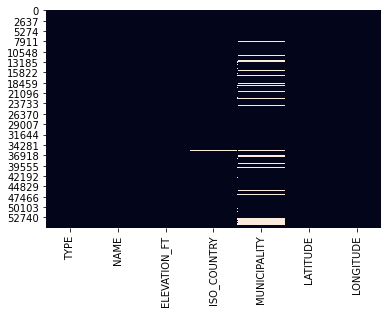

In [15]:
sns.heatmap(Airport_codes.isnull(),cbar=False)

### Finding whether we have an outlier in the elevation column or not using Boxplot

<AxesSubplot:xlabel='ELEVATION_FT'>

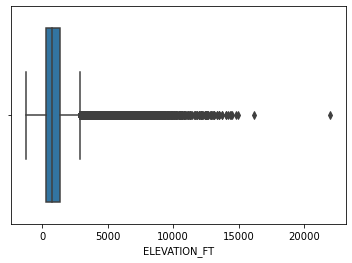

In [16]:
# checking the outlier for the elevation feet column
# from this graph we can see that there are many outliers in the elevation_ft column.
sns.boxplot(x=Airport_codes['ELEVATION_FT'])

In [17]:
# using IQR(interquartile range) to is a first quartile subtracted from the third quartile which helps to identify the outliers)
Q1 = Airport_codes.quantile(0.25)
Q3 = Airport_codes.quantile(0.75)
IQR = Q3 - Q1
IQR

ELEVATION_FT    1033.0
dtype: float64

#### dropping the outliers of elevation feet column

In [18]:
# removing the outliers
Airport_codes_1 = Airport_codes[~((Airport_codes < (Q1 - 1.5 * IQR)) |(Airport_codes > (Q3 + 1.5 * IQR))).any(axis=1)]
Airport_codes_1.shape

(49456, 7)

#### since we will be not be using elevation feet and coordinates for interpretation. dropping elevation and coordinates columns as well

In [19]:
Airport_codes.drop(columns=['ELEVATION_FT'],inplace=True)
Airport_codes.head()

TYPE                                NAME ISO_COUNTRY  \
0       heliport                   Total Rf Heliport          US   
1  small_airport                Aero B Ranch Airport          US   
2  small_airport                        Lowell Field          US   
3  small_airport                        Epps Airpark          US   
4         closed  Newport Hospital & Clinic Heliport          US   

   MUNICIPALITY            LATITUDE           LONGITUDE  
0      Bensalem      40.07080078125  -74.93360137939453  
1         Leoti           38.704022         -101.473911  
2  Anchor Point         59.94919968      -151.695999146  
3       Harvest   34.86479949951172  -86.77030181884766  
4       Newport             35.6087          -91.254898

#### In column type of airports we will be using only medium and large airports. filtering based on medium airport and large airport

In [20]:
#filtering the data based on medium and large airports
airports=['medium_airport','large_airport']
Airport_codes=Airport_codes[Airport_codes['TYPE'].isin(airports)]

In [21]:
# changing the index values
Airport_codes.reset_index(drop=True,inplace=True)
Airport_codes.head()

TYPE                           NAME ISO_COUNTRY    MUNICIPALITY  \
0  medium_airport        Aleknagik / New Airport          US       Aleknagik   
1  medium_airport  Honiara International Airport          SB         Honiara   
2  medium_airport                  Munda Airport          SB             NaN   
3  medium_airport               Hongyuan Airport          CN             Aba   
4  medium_airport    Nauru International Airport          NR  Yaren District   

              LATITUDE           LONGITUDE  
0        59.2826004028      -158.617996216  
1     -9.4280004501343     160.05499267578  
2   -8.327969551086426  157.26300048828125  
3             32.53154           102.35224  
4            -0.547458          166.919006

In [22]:
# This shows that there are only airports in dataframe right now
Airport_codes['TYPE'].unique()

array(['medium_airport', 'large_airport'], dtype=object)

In [23]:
# After performing the data analysis on Aiport _codes data
# we have 5146 rows and 2 columns to be used for visualization
Airport_codes.shape

(5146, 6)

In [24]:
# finding airport operation cost for medium is 5000$ and large is 10000$
Airport_codes['Airport_operational_cost']=np.where(Airport_codes['TYPE']=='medium_airport',5000,10000)

#### performed data analysis on airport codes data

In [25]:
Airport_codes.head()

TYPE                           NAME ISO_COUNTRY    MUNICIPALITY  \
0  medium_airport        Aleknagik / New Airport          US       Aleknagik   
1  medium_airport  Honiara International Airport          SB         Honiara   
2  medium_airport                  Munda Airport          SB             NaN   
3  medium_airport               Hongyuan Airport          CN             Aba   
4  medium_airport    Nauru International Airport          NR  Yaren District   

              LATITUDE           LONGITUDE  Airport_operational_cost  
0        59.2826004028      -158.617996216                      5000  
1     -9.4280004501343     160.05499267578                      5000  
2   -8.327969551086426  157.26300048828125                      5000  
3             32.53154           102.35224                      5000  
4            -0.547458          166.919006                      5000

### 2. Flights Data 

In [26]:
# showing the top 5 rows
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0       -6.0        0.0    143.0   1025.0            0.97  
1        5.0        0.0    135.0    930.0            0.55  
2        4.0        0.0    132.0    930.0            0.91  
3       14.0        0.0    136.0    930.0            0.67  
4      -17.0        0.0    151.0   1005.0            0.62

In [27]:
# Statistical analysis of data
Flights.describe()

ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID     DEP_DELAY     ARR_DELAY  \
count       1.915886e+06     1.915886e+06  1.865535e+06  1.859895e+06   
mean        1.268815e+04     1.268927e+04  1.080275e+01  5.648737e+00   
std         1.521900e+03     1.521249e+03  5.016305e+01  5.241170e+01   
min         1.013500e+04     1.013500e+04 -6.300000e+01 -9.400000e+01   
25%         1.129200e+04     1.129200e+04 -6.000000e+00 -1.500000e+01   
50%         1.288900e+04     1.288900e+04 -2.000000e+00 -6.000000e+00   
75%         1.405700e+04     1.405700e+04  7.000000e+00  8.000000e+00   
max         1.621800e+04     1.621800e+04  2.941000e+03  2.923000e+03   

          CANCELLED  OCCUPANCY_RATE  
count  1.915886e+06    1.915576e+06  
mean   2.694002e-02    6.502339e-01  
std    1.619082e-01    2.019994e-01  
min    0.000000e+00    3.000000e-01  
25%    0.000000e+00    4.800000e-01  
50%    0.000000e+00    6.500000e-01  
75%    0.000000e+00    8.247386e-01  
max    1.000000e+00    1.000000e+00

In [28]:
# Knowing the type of each column
Flights.dtypes

FL_DATE               object
OP_CARRIER            object
TAIL_NUM              object
OP_CARRIER_FL_NUM     object
ORIGIN_AIRPORT_ID      int64
ORIGIN                object
ORIGIN_CITY_NAME      object
DEST_AIRPORT_ID        int64
DESTINATION           object
DEST_CITY_NAME        object
DEP_DELAY            float64
ARR_DELAY            float64
CANCELLED            float64
AIR_TIME              object
DISTANCE              object
OCCUPANCY_RATE       float64
dtype: object

In [29]:
# getting number of columns and rows
Flights.shape

(1915886, 16)

In [30]:
# checking the null values present in each column
Flights.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64

<AxesSubplot:>

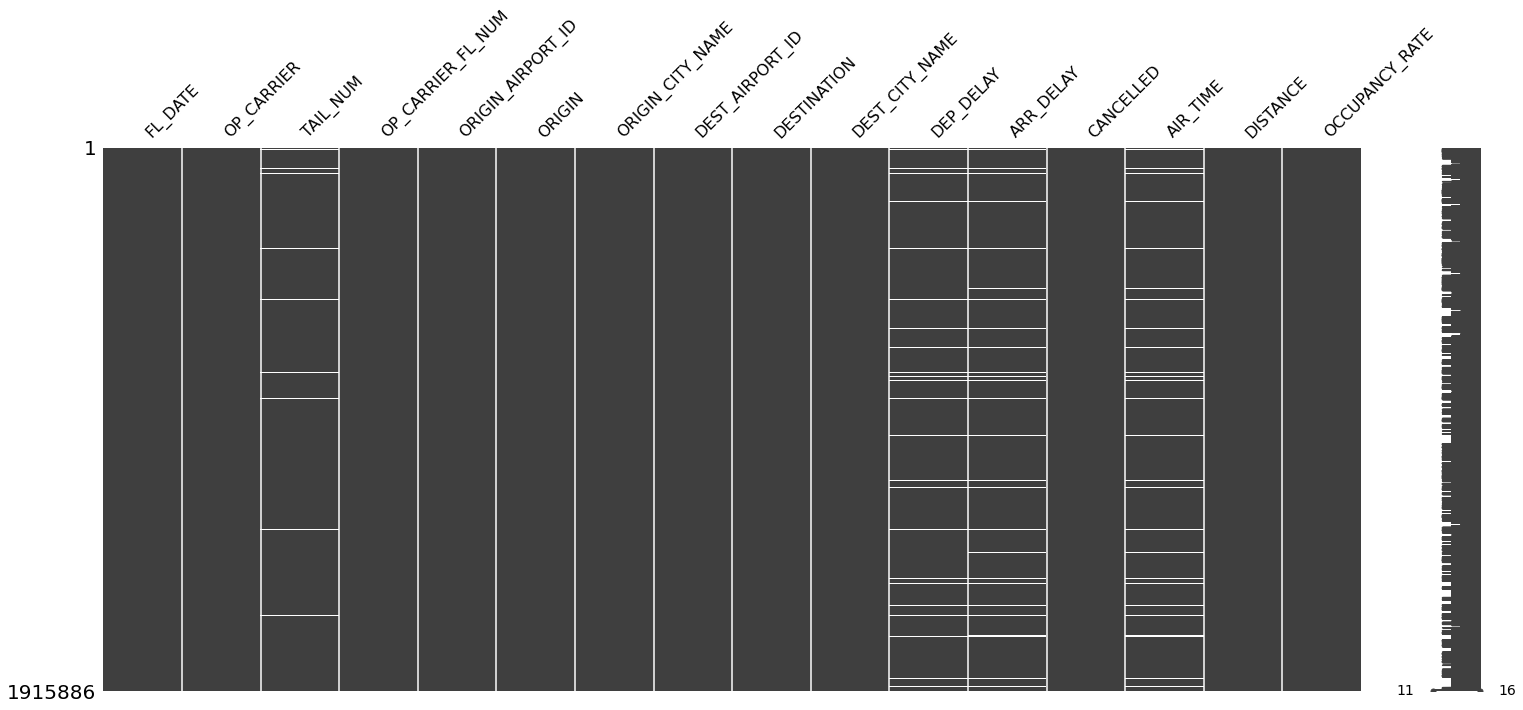

In [31]:
# using the missingingo plot to show the null values
msno.matrix(Flights)

In [32]:
# Converting the occupancy rate column to percentage by multiplying 100
Flights['OCCUPANCY_RATE']=Flights['OCCUPANCY_RATE']*100

In [33]:
# removing a 0 after dot for all columns in dataframe
Flights = Flights.round(decimals=0).astype(object)

In [34]:
# In distance and airtime columns removing after 0
Flights['DISTANCE']=Flights.DISTANCE.astype(str).str.split('.', expand = True)[0]
Flights['AIR_TIME']=Flights.AIR_TIME.astype(str).str.split('.', expand = True)[0]

In [35]:
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591             14635    RSW   
1  2019-03-02         WN   N8686A              3231             14635    RSW   
2  2019-03-02         WN   N201LV              3383             14635    RSW   
3  2019-03-02         WN   N413WN              5498             14635    RSW   
4  2019-03-02         WN   N7832A              6933             14635    RSW   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME DEP_DELAY  \
0   Fort Myers, FL           11042         CLE  Cleveland, OH        -8   
1   Fort Myers, FL           11066         CMH   Columbus, OH         1   
2   Fort Myers, FL           11066         CMH   Columbus, OH         0   
3   Fort Myers, FL           11066         CMH   Columbus, OH        11   
4   Fort Myers, FL           11259         DAL     Dallas, TX         0   

  ARR_DELAY CANCELLED AIR_TIME DISTANCE OCCUPANCY_RATE  
0        -6         0      143     1025             97  
1         5         0      135      930             55  
2         4         0      132      930             91  
3        14         0      136      930             67  
4       -17         0      151     1005             62

In [36]:
# some of dates are not in format
#changing all the dates into single format using datetime
Flights['FL_DATE'] = pd.to_datetime(Flights['FL_DATE'])

In [37]:
# Sorting the values by flight date
Flights.sort_values(by='FL_DATE',inplace=True)

In [38]:
# # Replacing the string value with integer value and making replacing nan values with 0 using nan below
# Flights['DISTANCE'].replace({'Hundred':'100','Twenty':'20','****':'0'},inplace=True)
# # Flights['DISTANCE'].fillna(0,inplace=True)

In [39]:
# Replacing the string value with interger value and making replacing nan values with 0
Flights['DISTANCE'].replace({'Hundred':'100','Twenty':'20','****':'0','nan':'0','NAN':'0','Nan':'0'},inplace=True)

In [40]:
# Now sorting the values by origin city name.
Flights.sort_values(by='ORIGIN_CITY_NAME',inplace=True)

In [41]:
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID  \
1358505 2019-01-11         OO   N455CA              7363             10141   
953917  2019-02-21         OO   N772SK              7365             10141   
1253507 2019-02-17         OO   N8942A              7365             10141   
1823475 2019-01-22         OO   N8965E              7363             10141   
220548  2019-03-20         OO   N919EV              7365             10141   

        ORIGIN ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION   DEST_CITY_NAME  \
1358505    ABR     Aberdeen, SD           13487         MSP  Minneapolis, MN   
953917     ABR     Aberdeen, SD           13487         MSP  Minneapolis, MN   
1253507    ABR     Aberdeen, SD           13487         MSP  Minneapolis, MN   
1823475    ABR     Aberdeen, SD           13487         MSP  Minneapolis, MN   
220548     ABR     Aberdeen, SD           13487         MSP  Minneapolis, MN   

        DEP_DELAY ARR_DELAY CANCELLED AIR_TIME DISTANCE OCCUPANCY_RATE  
1358505       -10       -13         0       55      257             66  
953917        231       223         0       44      257             92  
1253507        -3        -9         0       46      257             87  
1823475        -1         9         0       51      257             92  
220548        -10        -2         0       49      257             55

In [42]:
Flights.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME                 0
DISTANCE                 0
OCCUPANCY_RATE         310
dtype: int64

In [43]:
# filling the occu[ancy rate based on the median value
Flights['OCCUPANCY_RATE'].fillna(Flights['OCCUPANCY_RATE'].median(),inplace=True)

In [44]:
# deleting the row when the cancelled flight is 1 because we will be considering only not cancelled flights
Flights = Flights[Flights['CANCELLED']!=1]

In [45]:
# sorting the values by flight date
Flights.sort_values(by='FL_DATE',inplace=True)
Flights.reset_index(drop=True,inplace=True)
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N7888A               571             13891    ONT   
3 2019-01-01         WN   N8601C              1647             13891    ONT   
4 2019-01-01         WN   N432WN               620             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME DEP_DELAY  \
0    Las Vegas, NV           11697         FLL  Fort Lauderdale, FL         4   
1      Ontario, CA           12889         LAS        Las Vegas, NV         7   
2      Ontario, CA           12889         LAS        Las Vegas, NV        24   
3      Ontario, CA           11292         DEN           Denver, CO         1   
4      Ontario, CA           11292         DEN           Denver, CO        -6   

  ARR_DELAY CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  
0       -10         0      249     2173            79.0  
1         7         0       40      197            95.0  
2        26         0       39      197            97.0  
3         2         0      110      819            33.0  
4         2         0      119      819            58.0

In [46]:
#showing the null values
missing_df = Flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns', 'null values']
missing_df['filling factor (%)']=(Flights.shape[0]-missing_df['null values'])/Flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

columns  null values  filling factor (%)
0           ARR_DELAY         4377           99.765217
1             FL_DATE            0          100.000000
2          OP_CARRIER            0          100.000000
3            TAIL_NUM            0          100.000000
4   OP_CARRIER_FL_NUM            0          100.000000
5   ORIGIN_AIRPORT_ID            0          100.000000
6              ORIGIN            0          100.000000
7    ORIGIN_CITY_NAME            0          100.000000
8     DEST_AIRPORT_ID            0          100.000000
9         DESTINATION            0          100.000000
10     DEST_CITY_NAME            0          100.000000
11          DEP_DELAY            0          100.000000
12          CANCELLED            0          100.000000
13           AIR_TIME            0          100.000000
14           DISTANCE            0          100.000000
15     OCCUPANCY_RATE            0          100.000000

In [47]:
# since only 1% of values are missing so dropping them.
#dropping all the null values in arrival delay and departure delay
Flights.dropna(inplace=True)

In [48]:
# No of rows and columns after dropping
Flights.shape

(1859895, 16)

In [49]:
# We can see the there is no null values.
missing_df = Flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns', 'null values']
missing_df['filling factor (%)']=(Flights.shape[0]-missing_df['null values'])/Flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

columns  null values  filling factor (%)
0             FL_DATE            0               100.0
1          OP_CARRIER            0               100.0
2            TAIL_NUM            0               100.0
3   OP_CARRIER_FL_NUM            0               100.0
4   ORIGIN_AIRPORT_ID            0               100.0
5              ORIGIN            0               100.0
6    ORIGIN_CITY_NAME            0               100.0
7     DEST_AIRPORT_ID            0               100.0
8         DESTINATION            0               100.0
9      DEST_CITY_NAME            0               100.0
10          DEP_DELAY            0               100.0
11          ARR_DELAY            0               100.0
12          CANCELLED            0               100.0
13           AIR_TIME            0               100.0
14           DISTANCE            0               100.0
15     OCCUPANCY_RATE            0               100.0

In [50]:
# calculating number of persons travelled in the each flight.
# for each flight we have maximum number of persons is 200
# occupancy_Rate=(no.of person/maximum number of person) *100
Flights['PERSONS_TRAVELLED']=(Flights['OCCUPANCY_RATE']*200)/100
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N7888A               571             13891    ONT   
3 2019-01-01         WN   N8601C              1647             13891    ONT   
4 2019-01-01         WN   N432WN               620             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME DEP_DELAY  \
0    Las Vegas, NV           11697         FLL  Fort Lauderdale, FL         4   
1      Ontario, CA           12889         LAS        Las Vegas, NV         7   
2      Ontario, CA           12889         LAS        Las Vegas, NV        24   
3      Ontario, CA           11292         DEN           Denver, CO         1   
4      Ontario, CA           11292         DEN           Denver, CO        -6   

  ARR_DELAY CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  PERSONS_TRAVELLED  
0       -10         0      249     2173            79.0              158.0  
1         7         0       40      197            95.0              190.0  
2        26         0       39      197            97.0              194.0  
3         2         0      110      819            33.0               66.0  
4         2         0      119      819            58.0              116.0

In [51]:
# finding the operational costs for insurance,maintenance,fuel and maintenance,crew.
#cost split for flight is 8$ per mile total and insurance and remaning is 1.18$ 
Flights['DISTANCE'] = Flights['DISTANCE'].astype(int)
Flights['OTHER_COST']=(Flights['DISTANCE']*9.18)

In [52]:
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N7888A               571             13891    ONT   
3 2019-01-01         WN   N8601C              1647             13891    ONT   
4 2019-01-01         WN   N432WN               620             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME DEP_DELAY  \
0    Las Vegas, NV           11697         FLL  Fort Lauderdale, FL         4   
1      Ontario, CA           12889         LAS        Las Vegas, NV         7   
2      Ontario, CA           12889         LAS        Las Vegas, NV        24   
3      Ontario, CA           11292         DEN           Denver, CO         1   
4      Ontario, CA           11292         DEN           Denver, CO        -6   

  ARR_DELAY CANCELLED AIR_TIME  DISTANCE  OCCUPANCY_RATE  PERSONS_TRAVELLED  \
0       -10         0      249      2173            79.0              158.0   
1         7         0       40       197            95.0              190.0   
2        26         0       39       197            97.0              194.0   
3         2         0      110       819            33.0               66.0   
4         2         0      119       819            58.0              116.0   

   OTHER_COST  
0    19948.14  
1     1808.46  
2     1808.46  
3     7518.42  
4     7518.42

### Now checking whether the outliers is present in the arr_delay and departure delay by using Interquartile range for each column seperatley

#### There are two ways for detecting and removing the outliers
         1. Box plot using Interquartile range
         2. Using Z score

<AxesSubplot:xlabel='ARR_DELAY'>

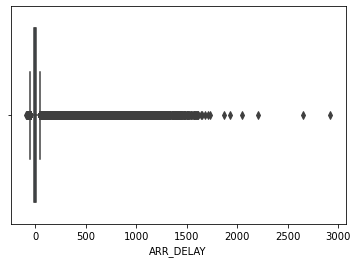

In [53]:
# so we can see there are many outliers present in the arrival_delay
sns.boxplot(x=Flights['ARR_DELAY'])

In [54]:
# Finding the Interquartile range= 75 percentile -25 percentile
Q1 = Flights['ARR_DELAY'].quantile(0.25)
Q3 = Flights['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1
IQR

23.0

In [55]:
# getting the upper and lower boundary values to filter the data accordingly
lower_bound_value=Q1-(1.5 *IQR)
upper_bound_value=Q3+(1.5*IQR)
print(lower_bound_value,upper_bound_value)

-49.5 42.5


In [56]:
# Filtering the data based on the lower_bound_values and upper_boun_values
Flights=Flights.loc[(Flights['ARR_DELAY'] >lower_bound_value) & (Flights['ARR_DELAY'] <upper_bound_value)]
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N7888A               571             13891    ONT   
3 2019-01-01         WN   N8601C              1647             13891    ONT   
4 2019-01-01         WN   N432WN               620             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME DEP_DELAY  \
0    Las Vegas, NV           11697         FLL  Fort Lauderdale, FL         4   
1      Ontario, CA           12889         LAS        Las Vegas, NV         7   
2      Ontario, CA           12889         LAS        Las Vegas, NV        24   
3      Ontario, CA           11292         DEN           Denver, CO         1   
4      Ontario, CA           11292         DEN           Denver, CO        -6   

  ARR_DELAY CANCELLED AIR_TIME  DISTANCE  OCCUPANCY_RATE  PERSONS_TRAVELLED  \
0       -10         0      249      2173            79.0              158.0   
1         7         0       40       197            95.0              190.0   
2        26         0       39       197            97.0              194.0   
3         2         0      110       819            33.0               66.0   
4         2         0      119       819            58.0              116.0   

   OTHER_COST  
0    19948.14  
1     1808.46  
2     1808.46  
3     7518.42  
4     7518.42

<AxesSubplot:xlabel='DEP_DELAY'>

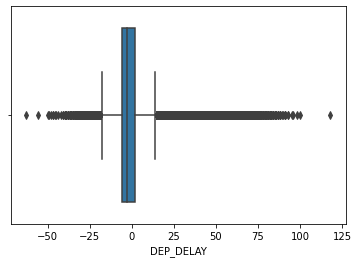

In [57]:
#using same method to find whether the outliers present in departure delay or not
sns.boxplot(x=Flights['DEP_DELAY'])

In [58]:
# Finding the 25th percentile and 75th percentile for departure delay.
# finding the InterQuartile range which is difference between q3 and q1
Q1 = Flights['DEP_DELAY'].quantile(0.25)
Q3 = Flights['DEP_DELAY'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.0

In [59]:
# Finding the lower bound and upper bound value and filtering the data according to those.
lower_bound_value=Q1-(1.5 *IQR)
upper_bound_value=Q3+(1.5*IQR)
print(lower_bound_value,upper_bound_value)

-18.0 14.0


In [60]:
# Filtering the data based on the lower_bound_values and upper_bound_values
Flights=Flights.loc[(Flights['DEP_DELAY'] >lower_bound_value) & (Flights['DEP_DELAY'] <upper_bound_value)]

In [61]:
# using where statement writing the departure delay operational cost if it is > 15 multiplying *75 per minute else 0
Flights['DEP_DELAY_OPERATION_COSTS']= np.where(Flights['DEP_DELAY']<15,0,(Flights['DEP_DELAY']-15)*75)

In [62]:
# using where statement writing the Arrival delay operational cost if it is > 15 multiplying *75 per minute else 0
Flights['ARR_DELAY_OPERATION_COSTS']= np.where(Flights['ARR_DELAY']<15,0,(Flights['ARR_DELAY']-15)*75)
Flights.reset_index(drop=True,inplace=True)
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N8601C              1647             13891    ONT   
3 2019-01-01         WN   N432WN               620             13891    ONT   
4 2019-01-01         WN   N8624J              1823             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME DEP_DELAY  \
0    Las Vegas, NV           11697         FLL  Fort Lauderdale, FL         4   
1      Ontario, CA           12889         LAS        Las Vegas, NV         7   
2      Ontario, CA           11292         DEN           Denver, CO         1   
3      Ontario, CA           11292         DEN           Denver, CO        -6   
4      Ontario, CA           11259         DAL           Dallas, TX        -3   

  ARR_DELAY CANCELLED AIR_TIME  DISTANCE  OCCUPANCY_RATE  PERSONS_TRAVELLED  \
0       -10         0      249      2173            79.0              158.0   
1         7         0       40       197            95.0              190.0   
2         2         0      110       819            33.0               66.0   
3         2         0      119       819            58.0              116.0   
4        -9         0      145      1200            90.0              180.0   

   OTHER_COST DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS  
0    19948.14                         0                         0  
1     1808.46                         0                         0  
2     7518.42                         0                         0  
3     7518.42                         0                         0  
4    11016.00                         0                         0

### The above flights data is the final after filling the null values and filtering outliers and calaculating the operational costs and other costs such as insurance,fuel per mile

### 3. Tickets Dataset

In [63]:
# showing the top 5 rows
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   
1  201912723085  2019        1    ABI             US               TX   
2  201912723491  2019        1    ABI             US               TX   
3  201912723428  2019        1    ABI             US               TX   
4  201912723509  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0           Texas        1.0                MQ         1.0     736.0   
1           Texas        1.0                MQ         1.0     570.0   
2           Texas        1.0                MQ         1.0     564.0   
3           Texas        1.0                MQ         1.0     345.0   
4           Texas        0.0                MQ         1.0     309.0   

  DESTINATION  
0         DAB  
1         COS  
2         MCO  
3         LGA  
4         MGM

In [64]:
# finding the null values in tickets dataset
Tickets.isnull().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64

In [65]:
Tickets.shape

(1167285, 12)

In [66]:
# Considering only the round trips data and filtering the data.
Tickets=Tickets.loc[(Tickets['ROUNDTRIP']==1.0)]
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
10  201912723337  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0            Texas        1.0                MQ         1.0     736.0   
1            Texas        1.0                MQ         1.0     570.0   
2            Texas        1.0                MQ         1.0     564.0   
3            Texas        1.0                MQ         1.0     345.0   
10           Texas        1.0                MQ         1.0    1647.0   

   DESTINATION  
0          DAB  
1          COS  
2          MCO  
3          LGA  
10         JAX

In [67]:
# No of rows and columns in the dataset
Tickets.shape

(708600, 12)

In [68]:
# removing .0 after the value
Tickets['ITIN_FARE']=Tickets.ITIN_FARE.astype(str).str.split('.', expand = True)[0]

In [69]:
# we have $ value in itin fare and replace with space
Tickets['ITIN_FARE']=Tickets['ITIN_FARE'].str.replace('$','')

In [70]:
# Replaacing the nan values with 0
Tickets['ITIN_FARE']=Tickets['ITIN_FARE'].str.replace('nan','0')

In [71]:
# converting the values from string to int
Tickets['ITIN_FARE']= Tickets['ITIN_FARE'].astype(int)

<AxesSubplot:xlabel='ITIN_FARE'>

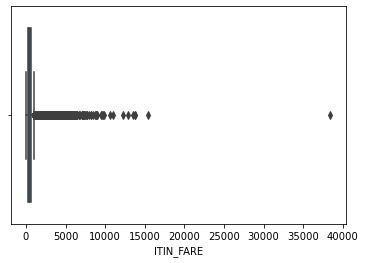

In [72]:
# checking whether the outliers are present or not in the iternary fare
sns.boxplot(x = 'ITIN_FARE', data = Tickets)

In [73]:
# finding interquartile range for itin fare
Q1 = Tickets['ITIN_FARE'].quantile(0.25)
Q3 = Tickets['ITIN_FARE'].quantile(0.75)
IQR = Q3 - Q1
IQR

317.0

In [74]:
# finding the lower_bound_value and upper_bound_value
lower_bound_value=Q1-(1.5 *IQR)
upper_bound_value=Q3+(1.5*IQR)
print(lower_bound_value,upper_bound_value)

-196.5 1071.5


In [75]:
# Removing all the outliers with lower_bound_value and upper_bound_value
Tickets=Tickets.loc[(Tickets['ITIN_FARE'] >lower_bound_value) & (Tickets['ITIN_FARE'] <upper_bound_value)]
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
11  201912723447  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0            Texas        1.0                MQ         1.0        736   
1            Texas        1.0                MQ         1.0        570   
2            Texas        1.0                MQ         1.0        564   
3            Texas        1.0                MQ         1.0        345   
11           Texas        1.0                MQ         1.0        425   

   DESTINATION  
0          DAB  
1          COS  
2          MCO  
3          LGA  
11         LIT

In the passengers column we have many outliers and it has more than 200 passengers in some of columns. but a flight can have maximum accomodate of 200 passengers. so removing all the rows which has more passengers greater than 200.

In [76]:
Tickets=Tickets.loc[Tickets['PASSENGERS'] <200]

In [77]:
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
11  201912723447  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0            Texas        1.0                MQ         1.0        736   
1            Texas        1.0                MQ         1.0        570   
2            Texas        1.0                MQ         1.0        564   
3            Texas        1.0                MQ         1.0        345   
11           Texas        1.0                MQ         1.0        425   

   DESTINATION  
0          DAB  
1          COS  
2          MCO  
3          LGA  
11         LIT

In [78]:
Tickets.shape

(676702, 12)

# Data quality issues faced that could impact recommendations

### After performing the data analysis I feel that the quality issues that I have faced is 
     1. Accuracy-The information is not accurate in every detail they are many outliers in the data.
     2.completeness- This data has the missing values.
     3.Consistency -The data should have data format as expected and can be cross referenceable with the same results
     4.conformity- some of the columns of intergers are in string format.
     5. Hidden data- It has more hidden data where we need to extract it from other columns

### Merging all the datasets into one

In [79]:
# Filter the data since we only need the country US
Airport_codes=Airport_codes.loc[Airport_codes['ISO_COUNTRY'] =='US']
Airport_codes.head()

TYPE                                               NAME  \
0     medium_airport                            Aleknagik / New Airport   
1451  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
1452  medium_airport                Lehigh Valley International Airport   
1453  medium_airport                           Abilene Regional Airport   
1454   large_airport                  Albuquerque International Sunport   

     ISO_COUNTRY   MUNICIPALITY          LATITUDE           LONGITUDE  \
0             US      Aleknagik     59.2826004028      -158.617996216   
1451          US  Andalusia/Opp           31.3088          -86.393799   
1452          US      Allentown   40.652099609375  -75.44080352783203   
1453          US        Abilene     32.4113006592  -99.68190002440001   
1454          US    Albuquerque         35.040199         -106.609001   

      Airport_operational_cost  
0                         5000  
1451                      5000  
1452                      5000  
1453                      5000  
1454                     10000

In [80]:
# Since origin_city_name has both city and state name contained in it
# Splitting the origin city name column by , and adding to seperate columns
Flights['ORIGIN_STATE_NAME']=Flights['ORIGIN_CITY_NAME'].astype(str).str.split(',', expand = True)[1]
Flights['ORIGIN_CITY_NAME']=Flights['ORIGIN_CITY_NAME'].astype(str).str.split(',', expand = True)[0]

In [81]:
#showing the flights data
Flights.head()

FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN  \
0 2019-01-01         WN   N8511K               349             12889    LAS   
1 2019-01-01         WN   N8624J              1821             13891    ONT   
2 2019-01-01         WN   N8601C              1647             13891    ONT   
3 2019-01-01         WN   N432WN               620             13891    ONT   
4 2019-01-01         WN   N8624J              1823             13891    ONT   

  ORIGIN_CITY_NAME DEST_AIRPORT_ID DESTINATION       DEST_CITY_NAME  ...  \
0        Las Vegas           11697         FLL  Fort Lauderdale, FL  ...   
1          Ontario           12889         LAS        Las Vegas, NV  ...   
2          Ontario           11292         DEN           Denver, CO  ...   
3          Ontario           11292         DEN           Denver, CO  ...   
4          Ontario           11259         DAL           Dallas, TX  ...   

  ARR_DELAY CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE  PERSONS_TRAVELLED  \
0       -10         0      249     2173            79.0              158.0   
1         7         0       40      197            95.0              190.0   
2         2         0      110      819            33.0               66.0   
3         2         0      119      819            58.0              116.0   
4        -9         0      145     1200            90.0              180.0   

   OTHER_COST  DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS  \
0    19948.14                          0                         0   
1     1808.46                          0                         0   
2     7518.42                          0                         0   
3     7518.42                          0                         0   
4    11016.00                          0                         0   

  ORIGIN_STATE_NAME  
0                NV  
1                CA  
2                CA  
3                CA  
4                CA  

[5 rows x 21 columns]

In [82]:
# IN the tickets data splitting the iterination id because last four digits are operating carrier flight number
Tickets['FL_NUMBER']=Tickets['ITIN_ID'].astype(str).str[8:]
Tickets.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
11  201912723447  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ITIN_FARE  \
0            Texas        1.0                MQ         1.0        736   
1            Texas        1.0                MQ         1.0        570   
2            Texas        1.0                MQ         1.0        564   
3            Texas        1.0                MQ         1.0        345   
11           Texas        1.0                MQ         1.0        425   

   DESTINATION FL_NUMBER  
0          DAB      3049  
1          COS      3085  
2          MCO      3491  
3          LGA      3428  
11         LIT      3447

In [83]:
# shape of the tickets data
Tickets.shape

(676702, 13)

#### Merging the tickets and flights dataset by left_on =origin,flightnumber and destination from tickets data and right_on= origin, operating carrier flight number and destination and using inner join for merging both datasets

In [84]:
# Merge the two datasets on different columns
df=pd.merge(Tickets,Flights,how='inner',left_on=['ORIGIN','FL_NUMBER','DESTINATION'],right_on=['ORIGIN','OP_CARRIER_FL_NUM','DESTINATION'])

In [85]:
#showing the top 5 rows
df.head()

ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912733717  2019        1    BPT             US               TX   
1  201912733717  2019        1    BPT             US               TX   
2  201912733717  2019        1    BPT             US               TX   
3  201912733717  2019        1    BPT             US               TX   
4  201912733717  2019        1    BPT             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS  ...  ARR_DELAY  \
0           Texas        1.0                MQ         1.0  ...        -14   
1           Texas        1.0                MQ         1.0  ...          8   
2           Texas        1.0                MQ         1.0  ...         26   
3           Texas        1.0                MQ         1.0  ...        -12   
4           Texas        1.0                MQ         1.0  ...          5   

  CANCELLED AIR_TIME DISTANCE OCCUPANCY_RATE PERSONS_TRAVELLED OTHER_COST  \
0         0       46      270           93.0             186.0     2478.6   
1         0       61      270           74.0             148.0     2478.6   
2         0       51      270           34.0              68.0     2478.6   
3         0       52      270           98.0             196.0     2478.6   
4         0       59      270           56.0             112.0     2478.6   

  DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS ORIGIN_STATE_NAME  
0                         0                         0                TX  
1                         0                         0                TX  
2                         0                       825                TX  
3                         0                         0                TX  
4                         0                         0                TX  

[5 rows x 32 columns]

In [86]:
# Now merging the Airport Codes and df data on Municpality(which is airport_city name) and origin_city_name 
Final_dataset=pd.merge(Airport_codes,df,left_on='MUNICIPALITY',right_on='ORIGIN_CITY_NAME')

In [87]:
# so the final dataset top rows look like
Final_dataset.head()

TYPE                                NAME ISO_COUNTRY  \
0   large_airport   Albuquerque International Sunport          US   
1  medium_airport  Southwest Georgia Regional Airport          US   
2  medium_airport  Southwest Georgia Regional Airport          US   
3  medium_airport  Southwest Georgia Regional Airport          US   
4  medium_airport  Southwest Georgia Regional Airport          US   

  MUNICIPALITY             LATITUDE           LONGITUDE  \
0  Albuquerque            35.040199         -106.609001   
1       Albany   31.535499572753906  -84.19450378417969   
2       Albany   31.535499572753906  -84.19450378417969   
3       Albany   31.535499572753906  -84.19450378417969   
4       Albany   31.535499572753906  -84.19450378417969   

   Airport_operational_cost       ITIN_ID  YEAR  QUARTER  ... ARR_DELAY  \
0                     10000  201914281959  2019        1  ...       -20   
1                      5000  201914293380  2019        1  ...       -25   
2                      5000   20191120119  2019        1  ...       -22   
3                      5000   20191120119  2019        1  ...       -16   
4                      5000   20191120119  2019        1  ...         1   

  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE PERSONS_TRAVELLED  OTHER_COST  \
0         0      173     1670            81.0             162.0    15330.60   
1         0      153     1073            35.0              70.0     9850.14   
2         0      162     1073            43.0              86.0     9850.14   
3         0      156     1073            86.0             172.0     9850.14   
4         0      160     1073            41.0              82.0     9850.14   

   DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS ORIGIN_STATE_NAME  
0                          0                         0                NM  
1                          0                         0                NY  
2                          0                         0                NY  
3                          0                         0                NY  
4                          0                         0                NY  

[5 rows x 39 columns]

In [88]:
# checking all the null values in the final dataset we can see there are no null values
Final_dataset.isnull().sum()

TYPE                         0
NAME                         0
ISO_COUNTRY                  0
MUNICIPALITY                 0
LATITUDE                     0
LONGITUDE                    0
Airport_operational_cost     0
ITIN_ID                      0
YEAR                         0
QUARTER                      0
ORIGIN                       0
ORIGIN_COUNTRY               0
ORIGIN_STATE_ABR             0
ORIGIN_STATE_NM              0
ROUNDTRIP                    0
REPORTING_CARRIER            0
PASSENGERS                   0
ITIN_FARE                    0
DESTINATION                  0
FL_NUMBER                    0
FL_DATE                      0
OP_CARRIER                   0
TAIL_NUM                     0
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_CITY_NAME             0
DEST_AIRPORT_ID              0
DEST_CITY_NAME               0
DEP_DELAY                    0
ARR_DELAY                    0
CANCELLED                    0
AIR_TIME                     0
DISTANCE

In [89]:
# Shape of final_dataset before dropping duplicates
Final_dataset.shape

(42095, 39)

In [90]:
# dropping the duplicates
Final_dataset.drop_duplicates(inplace=True)

In [91]:
# shape of the final data
Final_dataset.shape

(40732, 39)

In [92]:
Final_dataset.head()

TYPE                                NAME ISO_COUNTRY  \
0   large_airport   Albuquerque International Sunport          US   
1  medium_airport  Southwest Georgia Regional Airport          US   
2  medium_airport  Southwest Georgia Regional Airport          US   
3  medium_airport  Southwest Georgia Regional Airport          US   
4  medium_airport  Southwest Georgia Regional Airport          US   

  MUNICIPALITY             LATITUDE           LONGITUDE  \
0  Albuquerque            35.040199         -106.609001   
1       Albany   31.535499572753906  -84.19450378417969   
2       Albany   31.535499572753906  -84.19450378417969   
3       Albany   31.535499572753906  -84.19450378417969   
4       Albany   31.535499572753906  -84.19450378417969   

   Airport_operational_cost       ITIN_ID  YEAR  QUARTER  ... ARR_DELAY  \
0                     10000  201914281959  2019        1  ...       -20   
1                      5000  201914293380  2019        1  ...       -25   
2                      5000   20191120119  2019        1  ...       -22   
3                      5000   20191120119  2019        1  ...       -16   
4                      5000   20191120119  2019        1  ...         1   

  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE PERSONS_TRAVELLED  OTHER_COST  \
0         0      173     1670            81.0             162.0    15330.60   
1         0      153     1073            35.0              70.0     9850.14   
2         0      162     1073            43.0              86.0     9850.14   
3         0      156     1073            86.0             172.0     9850.14   
4         0      160     1073            41.0              82.0     9850.14   

   DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS ORIGIN_STATE_NAME  
0                          0                         0                NM  
1                          0                         0                NY  
2                          0                         0                NY  
3                          0                         0                NY  
4                          0                         0                NY  

[5 rows x 39 columns]

# some of the other Visualizations using the Final dataset

### Finding the number of large and medium airports present in the Final datasets. we will be using the seaborn package to count the number of airports

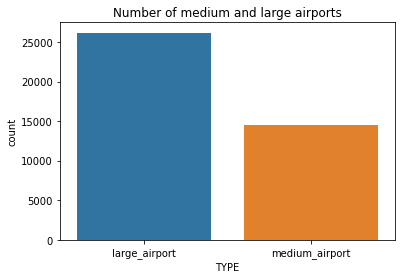

In [93]:
# Countplot showing the number of large_airports and medium airports
sns.countplot(x='TYPE',data=Final_dataset).set(title='Number of medium and large airports')
plt.show()

### finding the types of airport present in each state using catplot in seaborn package

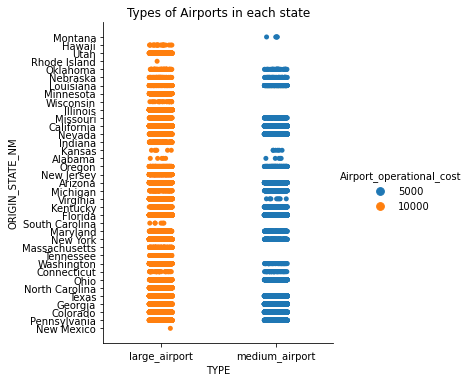

In [94]:
# plotiing between type and origin state name using catplot
sns.catplot(x="TYPE", y="ORIGIN_STATE_NM",hue='Airport_operational_cost', data=Final_dataset).set(title='Types of Airports in each state')

### Best airports interms of early departure

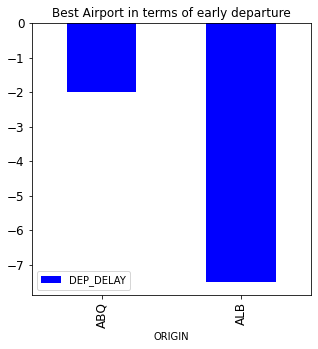

In [95]:
# In order to find that converting the column to numeric and filtering the dep delay<0 and sorting using dep delay.
Final_dataset["DEP_DELAY"] = pd.to_numeric(Final_dataset["DEP_DELAY"])
best_departure = Final_dataset[Final_dataset['DEP_DELAY']<0]
best_departure = best_departure[:5].sort_values(['DEP_DELAY']).groupby(['ORIGIN']).agg({'DEP_DELAY':'mean'})
best_departure.plot(kind='bar',color='blue', title ="Best Airport in terms of early departure",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

### Best airports in terms of early arrival

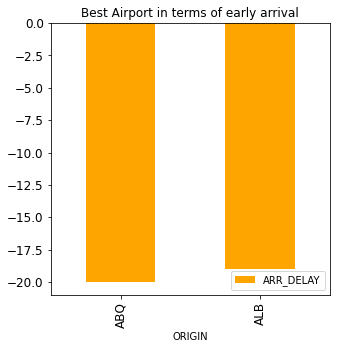

In [96]:
# Best airport in terms of arrival
Final_dataset["ARR_DELAY"] = pd.to_numeric(Final_dataset["ARR_DELAY"])
best_departure = Final_dataset[Final_dataset['ARR_DELAY']<0]
best_departure = best_departure[:5].sort_values(['ARR_DELAY']).groupby(['ORIGIN']).agg({'ARR_DELAY':'mean'})
best_departure.plot(kind='bar',color='orange', title ="Best Airport in terms of early arrival",figsize=(5,5),legend=True, fontsize=12)
plt.show()
plt.close()

### Let us generate some correlation plots of the features to see how related one feature is to the next.we will use the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

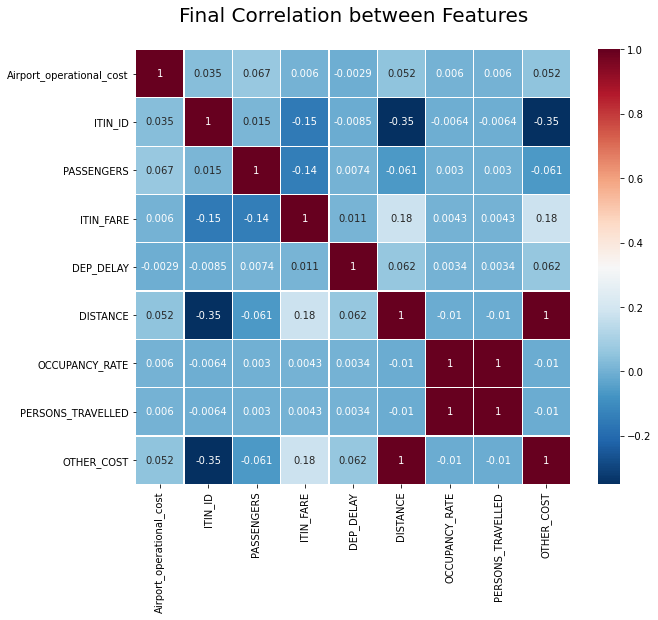

In [97]:
corr=pd.DataFrame(Final_dataset,columns=['Airport_operational_cost','ITIN_ID','PASSENGERS','ITIN_FARE','DEP_DELAY','DISTANCE','OCCUPANCY_RATE','PERSONS_TRAVELLED','OTHER_COST'])
plt.figure(figsize=(10,8))
plt.title('Final Correlation between Features', y=1.05, size=20)
sns.heatmap(corr.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

# Problem Statement

# 1.The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.

In [98]:
# In order to find the count on the flights grouping by origin and destination
# And adding the groupby conditiuon to dataframe
d=Final_dataset.groupby(['ORIGIN','DESTINATION']).size().reset_index()
busy=pd.DataFrame(d)

In [99]:
# Here if the values not present in destination then eliminating those because we need round trip from both destinations.
values=busy['DESTINATION']
busy=busy.loc[busy['ORIGIN'].isin(values)]

In [100]:
# finding the number of columns and rows in current dataset
busy.shape

(560, 3)

In [101]:
# Renaming the column as count
# Showing the top 5 rows
busy.rename(columns={0:'Flights'},inplace=True)
busy.head()

ORIGIN DESTINATION  Flights
0    ABQ         BWI        1
1    ALB         MCO      130
2    ALB         ORD        2
3    ALB         PGD       78
4    ALB         RSW       12

In [102]:
# Here resetting the index because index is not in correct order
busy.reset_index(drop=True,inplace=True)

In [103]:
# Creating a new column and adding both origin and destination
# The destination also has route to the origin then  adding the same value to both the rows.  
z=[1 for _ in range(len(busy['ORIGIN']))]
for i in range(len(busy['ORIGIN'])):
    for j in range(len(busy['DESTINATION'])):
        if busy['ORIGIN'][i]==busy['DESTINATION'][j]:
            z[i]=busy['DESTINATION'][i]+busy['ORIGIN'][i]
            z[j]=busy['ORIGIN'][j]+busy['DESTINATION'][j]

In [104]:
# In the above program added all the values to the list and adding it to the new column
busy['ORIGIN_DESTINATION']=z

In [105]:
# Again groupby using by origin _destination column by flights counts
busy=busy.groupby(['ORIGIN_DESTINATION'])['Flights'].sum()

In [106]:
#passing the groupby function again to the dataframe and making the proper index
busiest=pd.DataFrame(busy)
busiest.reset_index(inplace=True)

In [107]:
# SOrting the values by flights
busiest.sort_values(by='Flights',ascending=False,inplace=True)

In [108]:
# After sorting again making the index in correct format
busiest.reset_index(drop=True,inplace=True)
busiest.head(10)

ORIGIN_DESTINATION  Flights
0             LASLAX      883
1             ATLMSY      877
2             ORDPHX      758
3             DENPHX      725
4             ORDSAN      564
5             IAHORD      545
6             DENORD      515
7             ATLMCO      511
8             DFWLAS      500
9             LGAORD      486

In [109]:
# seperate the column of origin_destination to two seperate columns
busiest['ORIGIN']=busiest['ORIGIN_DESTINATION'].str[:3]
busiest['DESTINATION']=busiest['ORIGIN_DESTINATION'].str[3:]

In [110]:
# Printing the 10 busiest roundtrip routes.
busiest.reset_index(drop=True,inplace=True)
busiest.head(10)

ORIGIN_DESTINATION  Flights ORIGIN DESTINATION
0             LASLAX      883    LAS         LAX
1             ATLMSY      877    ATL         MSY
2             ORDPHX      758    ORD         PHX
3             DENPHX      725    DEN         PHX
4             ORDSAN      564    ORD         SAN
5             IAHORD      545    IAH         ORD
6             DENORD      515    DEN         ORD
7             ATLMCO      511    ATL         MCO
8             DFWLAS      500    DFW         LAS
9             LGAORD      486    LGA         ORD

# Busiest airport in terms of round trips

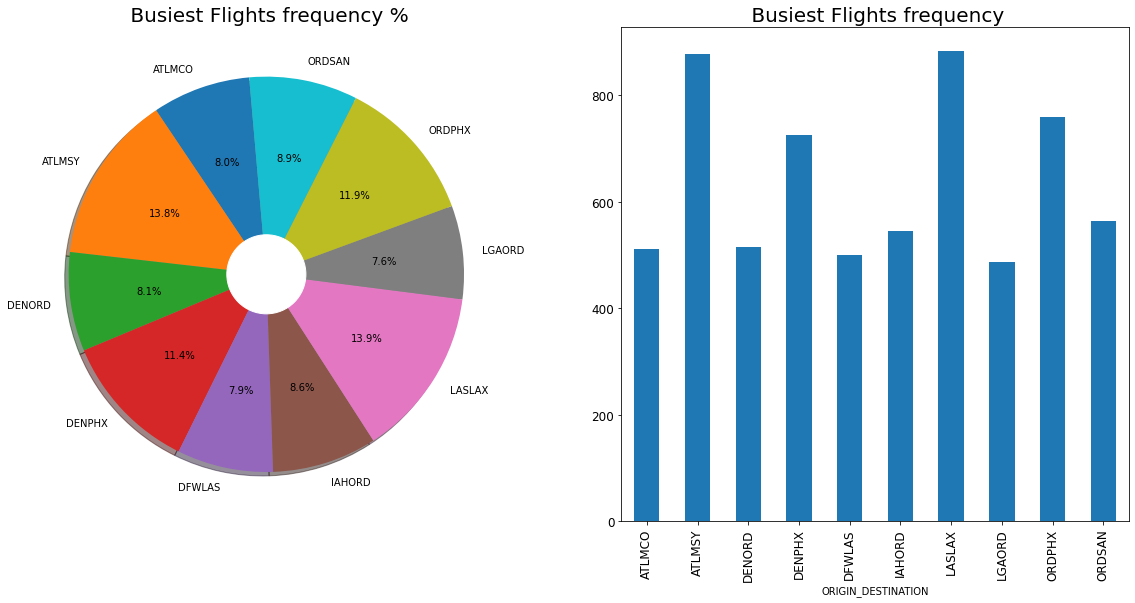

In [111]:
# Groupby on origin and taking top 10 rows
busiest_plot= busiest[:10].groupby(['ORIGIN_DESTINATION'])['Flights'].max()
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(busiest_plot, labeldistance=1.1, labels=busiest_plot.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title(" Busiest Flights frequency %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title(" Busiest Flights frequency", fontsize=20);
ax2.set_facecolor('white')
busiest_plot.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.show()

## From the above we can conclude these are the top 10 busiest round trip routes.
1. Las vegas(LAS)  -- Los Angeles Internation Airport(LAX)
2. Atlanta(ATL)    -- New Orleans(MSY)
3. Chicago(ORD)    -- Phoenix,AZ(PHX)
4. Denver(DEN)     -- Phoenix,AZ(PHX)
5. Chicago(ORD)   -- san Deigo,california(SAN)
6. Houston,Tx(IAH) -- Chicago(ORD)
7. Denver(DEN)     -- Chicago(ORD)
8. Atlanta(ATL)    -- Orlando,FL(MCO)
9. Dallas,tx(DFW)  -- Los Angeles(LAX)
10. Newyork (LGA)  -- Chicago(ORD)

# 2.The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations

In [112]:
#from the final dataset taking the columns required
Final_dataset.head(2)

TYPE                                NAME ISO_COUNTRY  \
0   large_airport   Albuquerque International Sunport          US   
1  medium_airport  Southwest Georgia Regional Airport          US   

  MUNICIPALITY             LATITUDE           LONGITUDE  \
0  Albuquerque            35.040199         -106.609001   
1       Albany   31.535499572753906  -84.19450378417969   

   Airport_operational_cost       ITIN_ID  YEAR  QUARTER  ... ARR_DELAY  \
0                     10000  201914281959  2019        1  ...     -20.0   
1                      5000  201914293380  2019        1  ...     -25.0   

  CANCELLED AIR_TIME DISTANCE  OCCUPANCY_RATE PERSONS_TRAVELLED  OTHER_COST  \
0         0      173     1670            81.0             162.0    15330.60   
1         0      153     1073            35.0              70.0     9850.14   

   DEP_DELAY_OPERATION_COSTS ARR_DELAY_OPERATION_COSTS ORIGIN_STATE_NAME  
0                          0                         0                NM  
1                          0                         0                NY  

[2 rows x 39 columns]

In [113]:
# since it has some of the values with 0 in distance column since it consists of all same rows
# SO replacing it with its distance value manually.
Final_dataset['DISTANCE'] = Final_dataset['DISTANCE'].replace(0,1025)

In [114]:
# Showing the columns
Final_dataset.columns

Index(['TYPE', 'NAME', 'ISO_COUNTRY', 'MUNICIPALITY', 'LATITUDE', 'LONGITUDE',
       'Airport_operational_cost', 'ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN',
       'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP',
       'REPORTING_CARRIER', 'PASSENGERS', 'ITIN_FARE', 'DESTINATION',
       'FL_NUMBER', 'FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID',
       'DEST_CITY_NAME', 'DEP_DELAY', 'ARR_DELAY', 'CANCELLED', 'AIR_TIME',
       'DISTANCE', 'OCCUPANCY_RATE', 'PERSONS_TRAVELLED', 'OTHER_COST',
       'DEP_DELAY_OPERATION_COSTS', 'ARR_DELAY_OPERATION_COSTS',
       'ORIGIN_STATE_NAME'],
      dtype='object')

In [115]:
# Using only the columns required
profit=pd.DataFrame(Final_dataset,columns=['ORIGIN','DESTINATION','Airport_operational_cost','ITIN_FARE','PASSENGERS','OCCUPANCY_RATE','PERSONS_TRAVELLED','OTHER_COST','DEP_DELAY_OPERATION_COSTS','DISTANCE','ARR_DELAY_OPERATION_COSTS'])

In [116]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  ITIN_FARE  PASSENGERS  \
0    ABQ         BWI                     10000        595         1.0   
1    ALB         MCO                      5000        205         1.0   
2    ALB         MCO                      5000        350         1.0   
3    ALB         MCO                      5000        350         1.0   
4    ALB         MCO                      5000        350         1.0   

   OCCUPANCY_RATE  PERSONS_TRAVELLED  OTHER_COST DEP_DELAY_OPERATION_COSTS  \
0            81.0              162.0    15330.60                         0   
1            35.0               70.0     9850.14                         0   
2            43.0               86.0     9850.14                         0   
3            86.0              172.0     9850.14                         0   
4            41.0               82.0     9850.14                         0   

   DISTANCE ARR_DELAY_OPERATION_COSTS  
0      1670                         0  
1      1073                         0  
2      1073                         0  
3      1073                         0  
4      1073                         0

In [117]:
profit.shape

(40732, 11)

In [118]:
# filtering out only origin present in destination
values=profit['DESTINATION']
profit=profit.loc[profit['ORIGIN'].isin(values)]

In [119]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  ITIN_FARE  PASSENGERS  \
0    ABQ         BWI                     10000        595         1.0   
1    ALB         MCO                      5000        205         1.0   
2    ALB         MCO                      5000        350         1.0   
3    ALB         MCO                      5000        350         1.0   
4    ALB         MCO                      5000        350         1.0   

   OCCUPANCY_RATE  PERSONS_TRAVELLED  OTHER_COST DEP_DELAY_OPERATION_COSTS  \
0            81.0              162.0    15330.60                         0   
1            35.0               70.0     9850.14                         0   
2            43.0               86.0     9850.14                         0   
3            86.0              172.0     9850.14                         0   
4            41.0               82.0     9850.14                         0   

   DISTANCE ARR_DELAY_OPERATION_COSTS  
0      1670                         0  
1      1073                         0  
2      1073                         0  
3      1073                         0  
4      1073                         0

In [120]:
profit.shape

(39766, 11)

### Adding the baggage fees to the customer. considering 50% of passengers are taking atleast one baggage which each bag costs 35 dollars and for round trip 70 dollars

In [121]:
# Adding the baggage fee column
profit['BAGGAGE']=(profit['PERSONS_TRAVELLED']//2)*35
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  ITIN_FARE  PASSENGERS  \
0    ABQ         BWI                     10000        595         1.0   
1    ALB         MCO                      5000        205         1.0   
2    ALB         MCO                      5000        350         1.0   
3    ALB         MCO                      5000        350         1.0   
4    ALB         MCO                      5000        350         1.0   

   OCCUPANCY_RATE  PERSONS_TRAVELLED  OTHER_COST DEP_DELAY_OPERATION_COSTS  \
0            81.0              162.0    15330.60                         0   
1            35.0               70.0     9850.14                         0   
2            43.0               86.0     9850.14                         0   
3            86.0              172.0     9850.14                         0   
4            41.0               82.0     9850.14                         0   

   DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  
0      1670                         0   2835.0  
1      1073                         0   1225.0  
2      1073                         0   1505.0  
3      1073                         0   3010.0  
4      1073                         0   1435.0

In [122]:
# getting the single passenger fare for flight by ITIN_FARE/ PASSENGERS
profit['ITIN_FARE']=profit['ITIN_FARE']/profit['PASSENGERS']

### Now Calculating the total ticket cost per flight. which is multiplying by persons_travelled * iterinary fare we have fare for each passenger

In [123]:
profit['TICKETS_COST']=profit['PERSONS_TRAVELLED']*profit['ITIN_FARE']

In [124]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  ITIN_FARE  PASSENGERS  \
0    ABQ         BWI                     10000      595.0         1.0   
1    ALB         MCO                      5000      205.0         1.0   
2    ALB         MCO                      5000      350.0         1.0   
3    ALB         MCO                      5000      350.0         1.0   
4    ALB         MCO                      5000      350.0         1.0   

   OCCUPANCY_RATE  PERSONS_TRAVELLED  OTHER_COST DEP_DELAY_OPERATION_COSTS  \
0            81.0              162.0    15330.60                         0   
1            35.0               70.0     9850.14                         0   
2            43.0               86.0     9850.14                         0   
3            86.0              172.0     9850.14                         0   
4            41.0               82.0     9850.14                         0   

   DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  TICKETS_COST  
0      1670                         0   2835.0       96390.0  
1      1073                         0   1225.0       14350.0  
2      1073                         0   1505.0       30100.0  
3      1073                         0   3010.0       60200.0  
4      1073                         0   1435.0       28700.0

### Now Calculating the Total expenses and total revenue and removing unwanted columns

In [125]:
# dropping unwanted columns
profit.drop(columns=['PASSENGERS','PERSONS_TRAVELLED','ITIN_FARE'],inplace=True)

In [126]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0    ABQ         BWI                     10000            81.0    15330.60   
1    ALB         MCO                      5000            35.0     9850.14   
2    ALB         MCO                      5000            43.0     9850.14   
3    ALB         MCO                      5000            86.0     9850.14   
4    ALB         MCO                      5000            41.0     9850.14   

  DEP_DELAY_OPERATION_COSTS  DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                         0      1670                         0   2835.0   
1                         0      1073                         0   1225.0   
2                         0      1073                         0   1505.0   
3                         0      1073                         0   3010.0   
4                         0      1073                         0   1435.0   

   TICKETS_COST  
0       96390.0  
1       14350.0  
2       30100.0  
3       60200.0  
4       28700.0

In [127]:
# Calculating the total expenses which is other cost and dep delay_costs and arr_delay_costs
profit['TOTAL_EXPENSES']=profit['OTHER_COST']+profit['DEP_DELAY_OPERATION_COSTS']+profit['ARR_DELAY_OPERATION_COSTS']+profit['Airport_operational_cost']

In [128]:
# Calaculating the total revenue which is baggage plus ticketcost
profit['TOTAL_REVENUE']=profit['BAGGAGE']+profit['TICKETS_COST']

In [129]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0    ABQ         BWI                     10000            81.0    15330.60   
1    ALB         MCO                      5000            35.0     9850.14   
2    ALB         MCO                      5000            43.0     9850.14   
3    ALB         MCO                      5000            86.0     9850.14   
4    ALB         MCO                      5000            41.0     9850.14   

  DEP_DELAY_OPERATION_COSTS  DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                         0      1670                         0   2835.0   
1                         0      1073                         0   1225.0   
2                         0      1073                         0   1505.0   
3                         0      1073                         0   3010.0   
4                         0      1073                         0   1435.0   

   TICKETS_COST TOTAL_EXPENSES  TOTAL_REVENUE  
0       96390.0        25330.6        99225.0  
1       14350.0        14850.1        15575.0  
2       30100.0        14850.1        31605.0  
3       60200.0        14850.1        63210.0  
4       28700.0        14850.1        30135.0

### Now calculating the profit per each flight Profit=Total Revenue-Total expenses

In [130]:
# Calculating the total profit by finding the difference between revenue and expenses
profit['PROFIT']=profit['TOTAL_REVENUE']-profit['TOTAL_EXPENSES']

In [131]:
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0    ABQ         BWI                     10000            81.0    15330.60   
1    ALB         MCO                      5000            35.0     9850.14   
2    ALB         MCO                      5000            43.0     9850.14   
3    ALB         MCO                      5000            86.0     9850.14   
4    ALB         MCO                      5000            41.0     9850.14   

  DEP_DELAY_OPERATION_COSTS  DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                         0      1670                         0   2835.0   
1                         0      1073                         0   1225.0   
2                         0      1073                         0   1505.0   
3                         0      1073                         0   3010.0   
4                         0      1073                         0   1435.0   

   TICKETS_COST TOTAL_EXPENSES  TOTAL_REVENUE   PROFIT  
0       96390.0        25330.6        99225.0  73894.4  
1       14350.0        14850.1        15575.0   724.86  
2       30100.0        14850.1        31605.0  16754.9  
3       60200.0        14850.1        63210.0  48359.9  
4       28700.0        14850.1        30135.0  15284.9

In [132]:
# Now doing groupby on ORIGIN and Destination and profit
profitted=profit.groupby(['ORIGIN','DESTINATION'])['PROFIT'].sum().reset_index()

In [133]:
profitted.shape

(560, 3)

In [134]:
# Making the index into be correct order
profitted.reset_index(drop=True,inplace=True)

In [135]:
# Adding the values of origin and destination to one single column.
# for every origin value it is also present in destination so making same value in both rows to make group by on origin_destination column
z=[1 for _ in range(len(profitted['ORIGIN']))]
for i in range(len(profitted['ORIGIN'])):
    for j in range(len(profitted['DESTINATION'])):
        if profitted['ORIGIN'][i]==profitted['DESTINATION'][j]:
            z[i]=profitted['DESTINATION'][i]+profitted['ORIGIN'][i]
            z[j]=profitted['ORIGIN'][j]+profitted['DESTINATION'][j]

In [136]:
# adding the z to the new column
profitted['ORIGIN_DESTINATION']=z

In [137]:
# New column has been added to the dataframe
profitted.head()

ORIGIN DESTINATION      PROFIT ORIGIN_DESTINATION
0    ABQ         BWI    73894.40             ABQBWI
1    ALB         MCO  4483971.80             ALBMCO
2    ALB         ORD    33749.72             ALBORD
3    ALB         PGD  -920069.90             PGDALB
4    ALB         RSW   893609.20             ALBRSW

In [138]:
# Now groupby on the origin_destination column and adding the profit present in both the rows
profitted=profitted.groupby(['ORIGIN_DESTINATION'])['PROFIT'].sum().reset_index()

In [139]:
# Loading into the new dataframe and reseting the index.
profitted=pd.DataFrame(profitted)
profitted.reset_index(drop=True,inplace=True)

In [140]:
profitted.head()

ORIGIN_DESTINATION      PROFIT
0             ABQBWI    73894.40
1             ABQHOU   328686.90
2             ABQLAS   592578.56
3             ABQLAX    27390.14
4             ABQSEA  1173283.20

In [141]:
# Sorting the values by profit descending
profitted.sort_values(by='PROFIT',ascending=False,inplace=True)
profitted.head()

ORIGIN_DESTINATION        PROFIT
29              ATLMSY  4.825750e+07
403             PHXSAN  2.800945e+07
173             DENORD  2.009664e+07
258             IAHORD  1.913636e+07
376             ORDPHX  1.854253e+07

In [142]:
# seperate the column of origin_destination to two seperate columns
profitted['ORIGIN']=profitted['ORIGIN_DESTINATION'].str[:3]
profitted['DESTINATION']=profitted['ORIGIN_DESTINATION'].str[3:]

In [143]:
# Resetting the index
profitted.reset_index(drop=True,inplace=True)

In [144]:
profitted.head(10)

ORIGIN_DESTINATION        PROFIT ORIGIN DESTINATION
0             ATLMSY  4.825750e+07    ATL         MSY
1             PHXSAN  2.800945e+07    PHX         SAN
2             DENORD  2.009664e+07    DEN         ORD
3             IAHORD  1.913636e+07    IAH         ORD
4             ORDPHX  1.854253e+07    ORD         PHX
5             DCAORD  1.824726e+07    DCA         ORD
6             CMHLAX  1.816387e+07    CMH         LAX
7             LAXPHX  1.782002e+07    LAX         PHX
8             PDXSLC  1.763527e+07    PDX         SLC
9             DENPHX  1.757890e+07    DEN         PHX

### Plotting 10 most profitable round trip routes using bubble plot in the plotly library 

In [145]:
fig = go.Figure(data=[go.Scatter(x=profitted['ORIGIN_DESTINATION'][:10], y=profitted['PROFIT'][:10],mode='markers',
                                 marker=dict(
                                     color=[120, 125, 130, 135, 140, 145,150,155,160,165],
                                     size=[110,100 ,90, 80 ,70,60, 45, 30, 15, 10],
                                     showscale=True))])
fig.update_layout(title="Most profitable round trip routes", xaxis_title="Origin_destination",yaxis_title="Profit")

fig.show()

### From above we can conclude these are the top 10 Trips profittable round trip routes.


1. Atlanta(ATL)- New Orleans(MSY)
2. Phoenix(PHX)- san Deigo,california(SAN)
3. Denver(DEN)- Chicago(ORD)
4. Houston,Tx(IAH)- Chicago(ORD)
5. Chicago(ORD)- Phoenix(PHX)
6. Arlington,VA(DCA)- Chicago(ORD)
7. columbus,ohio(CMH)- Los Angeles Internation Airport(LAX)
8. Los Angeles Internation Airport(LAX)- Phoenix(PHX)
9. portland,OR(PDX)- salt lake city,Utah(SLC)
10. Denver(DEN)- Phoenix(PHX)

## 3. The 5 round trip routes that you recommend to invest in based on any factors that you choose.

##### The 5 rounds trip routes which I recommend to invest based on 
      1.Profit
      2.Revenue
      3.Expenses
      4.Maximum flights travelled between origin and destination.
      5.Occupancy rate
      6. Arrival and Departure delay because our company’s motto is “On time, for you”.   

####  Merging dataframes from above to get the all the data i.e is profit, Flights and Expenses, Revenue and Occupancy rate

In [146]:
# Merging the profitted and busiest dataframes on origin_destination,origin and destination using inner join
Recommend=pd.merge(profitted,busiest,left_on=['ORIGIN_DESTINATION','ORIGIN','DESTINATION'],right_on=['ORIGIN_DESTINATION','ORIGIN','DESTINATION'],how='inner')

In [147]:
# Dropping the columns which is not required
profit.drop(columns=['PROFIT'],inplace=True)

In [148]:
# Now merging the above dataframe with profit on origin and destination
Recommended=pd.merge(Recommend,profit,left_on=['ORIGIN','DESTINATION'],right_on=['ORIGIN','DESTINATION'],how='inner')

In [149]:
#After merging the dataframe look like
Recommended.head()

ORIGIN_DESTINATION      PROFIT ORIGIN DESTINATION  Flights  \
0             ATLMSY  48257502.5    ATL         MSY      877   
1             ATLMSY  48257502.5    ATL         MSY      877   
2             ATLMSY  48257502.5    ATL         MSY      877   
3             ATLMSY  48257502.5    ATL         MSY      877   
4             ATLMSY  48257502.5    ATL         MSY      877   

   Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0                     10000            32.0      3901.5   
1                     10000            42.0      3901.5   
2                     10000            38.0      3901.5   
3                     10000            36.0      3901.5   
4                     10000            62.0      3901.5   

  DEP_DELAY_OPERATION_COSTS  DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                         0       425                         0   1120.0   
1                         0       425                         0   1470.0   
2                         0       425                         0   1330.0   
3                         0       425                         0   1260.0   
4                         0       425                         0   2170.0   

   TICKETS_COST TOTAL_EXPENSES  TOTAL_REVENUE  
0       46464.0        13901.5        47584.0  
1       60984.0        13901.5        62454.0  
2       55176.0        13901.5        56506.0  
3       52272.0        13901.5        53532.0  
4       90024.0        13901.5        92194.0

In [150]:
# Now grouping by on ORIGIN_DESTINATION because there are many rows with same origin and destination.
R=Recommended.groupby('ORIGIN_DESTINATION').max().reset_index()

In [151]:
R.head()

ORIGIN_DESTINATION      PROFIT ORIGIN DESTINATION  Flights  \
0             ABQBWI    73894.40    ABQ         BWI        1   
1             ALBMCO  4528685.38    ALB         MCO      133   
2             ALBORD    33749.72    ALB         ORD        2   
3             ALBRSW   893609.20    ALB         RSW       12   
4             ATLAUS   585463.20    ATL         AUS       20   

   Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0                     10000            81.0    15330.60   
1                      5000           100.0     9850.14   
2                      5000            32.0     6637.14   
3                      5000            85.0    11061.90   
4                     10000            77.0     7463.34   

   DEP_DELAY_OPERATION_COSTS  DISTANCE  ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                          0      1670                        0.0   2835.0   
1                          0      1073                     1950.0   3500.0   
2                          0       723                        0.0   1120.0   
3                          0      1205                      150.0   2975.0   
4                          0       813                        0.0   2695.0   

   TICKETS_COST  TOTAL_EXPENSES  TOTAL_REVENUE  
0       96390.0        25330.60        99225.0  
1       70000.0        16800.14        73500.0  
2       27392.0        11637.14        28512.0  
3      114240.0        16211.90       117215.0  
4       93632.0        17463.34        96327.0

In [152]:
# Sorting the values by profit descending, Total revenue descending, expenses Ascending, Arrival and delay operational costs ascending and occupancy rate descending
Recommending=R.sort_values(by=['PROFIT','TOTAL_REVENUE','Flights','TOTAL_EXPENSES','Airport_operational_cost','ARR_DELAY_OPERATION_COSTS','DEP_DELAY_OPERATION_COSTS','OCCUPANCY_RATE','BAGGAGE','TICKETS_COST'],ascending=[False,False,True,True,True,True,True,False,False,False]).reset_index(drop=True)

In [153]:
# Thesse are the top 5 rows after sorting on different factors
Recommending.head()

ORIGIN_DESTINATION        PROFIT ORIGIN DESTINATION  Flights  \
0             ATLMSY  4.825750e+07    ATL         MSY      877   
1             DENORD  2.009664e+07    DEN         ORD      515   
2             IAHORD  1.913636e+07    IAH         ORD      545   
3             ORDPHX  1.854253e+07    ORD         PHX      758   
4             CMHLAX  1.816387e+07    CMH         LAX      427   

   Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0                     10000           100.0     3901.50   
1                     10000           100.0     8151.84   
2                     10000            95.0     8491.50   
3                     10000           100.0    13219.20   
4                     10000            99.0    18314.10   

   DEP_DELAY_OPERATION_COSTS  DISTANCE  ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                          0       425                      450.0   3500.0   
1                          0       888                      600.0   3500.0   
2                          0       925                      675.0   3325.0   
3                          0      1440                     2025.0   3500.0   
4                          0      1995                     1650.0   3465.0   

   TICKETS_COST  TOTAL_EXPENSES  TOTAL_REVENUE  
0      145200.0        14351.50       148700.0  
1      153000.0        18751.84       156500.0  
2       79800.0        19166.50        83125.0  
3      167508.0        25244.20       170973.0  
4       96624.0        29964.10       100089.0

In [154]:
# Showing the number of columns and rows
Recommending.shape

(248, 15)

## In the below visualization we can clearly see the flights that is most recommended flight trips

In [155]:
fig = px.bar(Recommending[:5], x='ORIGIN_DESTINATION', y='PROFIT',color='Flights',
         hover_data=['TOTAL_REVENUE','TOTAL_EXPENSES','PROFIT','Flights','OCCUPANCY_RATE','DEP_DELAY_OPERATION_COSTS','ARR_DELAY_OPERATION_COSTS'],title='Most recommended Flights trips to Invest')
fig.show()

##### From the above I conclude that these are are the five route trip I am recommending to invest based on the factors of revenue,expenses,profit,Occupancy rate and most number of flights between these routes and also departure delay and arrival costs because our company main moto is On time and punctuality is a bigpart of brand image

# 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.
  
 ### upfront cost for each airplane is 90 million dollars

#### Now considering the profit dataframe to groupby on total revenue

In [156]:
# profit dataframe
profit.head()

ORIGIN DESTINATION  Airport_operational_cost  OCCUPANCY_RATE  OTHER_COST  \
0    ABQ         BWI                     10000            81.0    15330.60   
1    ALB         MCO                      5000            35.0     9850.14   
2    ALB         MCO                      5000            43.0     9850.14   
3    ALB         MCO                      5000            86.0     9850.14   
4    ALB         MCO                      5000            41.0     9850.14   

  DEP_DELAY_OPERATION_COSTS  DISTANCE ARR_DELAY_OPERATION_COSTS  BAGGAGE  \
0                         0      1670                         0   2835.0   
1                         0      1073                         0   1225.0   
2                         0      1073                         0   1505.0   
3                         0      1073                         0   3010.0   
4                         0      1073                         0   1435.0   

   TICKETS_COST TOTAL_EXPENSES  TOTAL_REVENUE  
0       96390.0        25330.6        99225.0  
1       14350.0        14850.1        15575.0  
2       30100.0        14850.1        31605.0  
3       60200.0        14850.1        63210.0  
4       28700.0        14850.1        30135.0

In [157]:
# Grouping by on the total revenue column 
# inserting the values into new dataframe
profit=profit.groupby(['ORIGIN','DESTINATION'])['TOTAL_REVENUE'].sum().reset_index()
breakeven=pd.DataFrame(profit)

In [158]:
# Resetting the index values
breakeven.reset_index(drop=True,inplace=True)

In [159]:
breakeven.head()

ORIGIN DESTINATION  TOTAL_REVENUE
0    ABQ         BWI        99225.0
1    ALB         MCO      6421240.0
2    ALB         ORD        57024.0
3    ALB         PGD       322637.5
4    ALB         RSW      1086652.0

In [160]:
# Here if the values not present in destination then eliminating those because we need round trip from both destinations.
values=breakeven['DESTINATION']
breakeven=breakeven.loc[breakeven['ORIGIN'].isin(values)]

In [161]:
# No of columns and rows in the data
breakeven.shape

(560, 3)

In [162]:
# Adding the values of origin and destination to one single column.
# for every origin value it is also present in destination so making same value in both rows to make group by on origin_destination column
z=[1 for _ in range(len(breakeven['ORIGIN']))]
for i in range(len(breakeven['ORIGIN'])):
    for j in range(len(breakeven['DESTINATION'])):
        if breakeven['ORIGIN'][i]==breakeven['DESTINATION'][j]:
            z[i]=breakeven['DESTINATION'][i]+breakeven['ORIGIN'][i]
            z[j]=breakeven['ORIGIN'][j]+breakeven['DESTINATION'][j]

In [163]:
# Adding the column to the data
breakeven['ORIGIN_DESTINATION']=z

In [164]:
# Top 5 rows
breakeven.head()

ORIGIN DESTINATION  TOTAL_REVENUE ORIGIN_DESTINATION
0    ABQ         BWI        99225.0             ABQBWI
1    ALB         MCO      6421240.0             ALBMCO
2    ALB         ORD        57024.0             ALBORD
3    ALB         PGD       322637.5             PGDALB
4    ALB         RSW      1086652.0             ALBRSW

In [165]:
# grouping by origin_destination column with total revenue and resetting index
breakeven=breakeven.groupby(['ORIGIN_DESTINATION'])['TOTAL_REVENUE'].sum().reset_index()

In [166]:
# Top 5 rows
breakeven.head()

ORIGIN_DESTINATION  TOTAL_REVENUE
0             ABQBWI        99225.0
1             ABQHOU       398525.0
2             ABQLAS       892500.0
3             ABQLAX        43605.0
4             ABQSEA      2673216.0

In [167]:
# Merging two dataframes breakeven and busiest for getting the number of flights and revenue
Breakeven=pd.merge(breakeven,busiest,on='ORIGIN_DESTINATION')

In [168]:
# sort the values by total revenue column descending
Breakeven.sort_values(by='TOTAL_REVENUE',ascending=False,inplace=True)

In [169]:
# Resetting the index
Breakeven.reset_index(drop=True,inplace=True)

In [170]:
Breakeven.head()

ORIGIN_DESTINATION  TOTAL_REVENUE  Flights ORIGIN DESTINATION
0             ATLMSY   5.740094e+07      877    ATL         MSY
1             ORDPHX   3.566798e+07      758    ORD         PHX
2             PHXSAN   3.224290e+07      468    PHX         SAN
3             ORDSAN   3.028111e+07      564    ORD         SAN
4             CMHLAX   2.907232e+07      427    CMH         LAX

In [171]:
# Filtering the data based on the values I recommend. 
values=['ATLMSY','DENORD','IAHORD','ORDPHX','CMHLAX']
Breakeven=Breakeven.loc[Breakeven['ORIGIN_DESTINATION'].isin(values)]

In [172]:
Breakeven.reset_index(drop=True,inplace=True)

In [173]:
Breakeven.head()

ORIGIN_DESTINATION  TOTAL_REVENUE  Flights ORIGIN DESTINATION
0             ATLMSY   5.740094e+07      877    ATL         MSY
1             ORDPHX   3.566798e+07      758    ORD         PHX
2             CMHLAX   2.907232e+07      427    CMH         LAX
3             DENORD   2.870668e+07      515    DEN         ORD
4             IAHORD   2.829128e+07      545    IAH         ORD

In [174]:
# Changing the profit values from e power to all integer values
pd.set_option('display.float_format', lambda x: '%.f' % x)

#### From the above data we can see the total number of round trip flights used to get the profit for each origin and destination

#### In order to get for flight profit  for single trip

In [175]:
# FInding the single trip profit based on the total profit/ total flights
pd.options.mode.chained_assignment = None
Breakeven['SINGLE_TRIP_REVENUE']=Breakeven['TOTAL_REVENUE']/Breakeven['Flights']

In [176]:
Breakeven

ORIGIN_DESTINATION  TOTAL_REVENUE  Flights ORIGIN DESTINATION  \
0             ATLMSY       57400943      877    ATL         MSY   
1             ORDPHX       35667981      758    ORD         PHX   
2             CMHLAX       29072316      427    CMH         LAX   
3             DENORD       28706683      515    DEN         ORD   
4             IAHORD       28291281      545    IAH         ORD   

   SINGLE_TRIP_REVENUE  
0                65451  
1                47055  
2                68085  
3                55741  
4                51911

#### Now calculating the number of flights required to get to the breakeven point which is 90 million for each round trip flight

In [177]:
# 90 million=number of roundtrips flights required*single trip profit
Breakeven['NUMBER_OF_ROUND_TRIPS']=(90000000/Breakeven['SINGLE_TRIP_REVENUE'])/2

In [178]:
Breakeven

ORIGIN_DESTINATION  TOTAL_REVENUE  Flights ORIGIN DESTINATION  \
0             ATLMSY       57400943      877    ATL         MSY   
1             ORDPHX       35667981      758    ORD         PHX   
2             CMHLAX       29072316      427    CMH         LAX   
3             DENORD       28706683      515    DEN         ORD   
4             IAHORD       28291281      545    IAH         ORD   

   SINGLE_TRIP_REVENUE  NUMBER_OF_ROUND_TRIPS  
0                65451                    688  
1                47055                    956  
2                68085                    661  
3                55741                    807  
4                51911                    867

In [179]:
# Showing the statstical description
Breakeven.describe()

TOTAL_REVENUE  Flights  SINGLE_TRIP_REVENUE  NUMBER_OF_ROUND_TRIPS
count              5        5                    5                      5
mean        35827841      624                57649                    796
std         12435554      186                 8924                    123
min         28291281      427                47055                    661
25%         28706683      515                51911                    688
50%         29072316      545                55741                    807
75%         35667981      758                65451                    867
max         57400943      877                68085                    956

### Plotting the pie chart to show the number of roundtrips required to break even upfront costs

In [180]:
fig = px.pie(Breakeven, values='NUMBER_OF_ROUND_TRIPS', names='ORIGIN_DESTINATION',title='Percentage of the round trips required to breakeven on Upfront costs ')
fig.show()

### Plotting the line graph using Plotly

In [181]:
fig = px.line(Breakeven, x='ORIGIN_DESTINATION', y="NUMBER_OF_ROUND_TRIPS",title='Number of Round trips flights required to breakeven upfront costs ')
fig.show()

### From the above we can see conclude the number of round trips to be done to break even the upfront cost -90 million
1. Atlanta(ATL)-New Orleans(MSY) -688 round trips
2. Denver-Chicago(ORD) --956
3. Houston,Tx(IAH)-Chicago(ORD)  --661
4. Chicago(ORD)-Phoenix(PHX)  -- 807
5. columbus,ohio(CMH)- Los Angeles Internation Airport(LAX)- 867

# 5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.

### Key performance indicators plays the most important prominent roles in order to track in the future to measure the success for airlines.

### I recommend some of of KPI's:

### 1. Punctuality: Departure and Arrival punctuality
        Because our company main motto is "On time, for you" which is bigger part of our brang image.Departure Punctuality calculates the percentage of flights that depart on-time at the planned origin airport concerning all operated flights. Like arrival punctuality, a flight counts as on-time if the departure delay is not greater than 15 minutes.
        
### 2. Regularity:
        This Indicator tells you how many flights an airline cancels on a regular basis.
        
        
### 3. Delay Reasons:
        This Indicator tells us for what reason the flight got delayed due to the reasons like bad weather or technical handling issues. Because these are more important to analyze the number of minutes it got delayed or can also calculate the average delay minutes per flight or average delay minutes a passenger experiences.
        
### 4. Passengers travelling:
       With this we can calculate the percentage of checked-in passengers in relation to an aircraft’s available seats. It tells us how much profit we gain by analyzing and also shows how many people are more liked and it more over focuses on customer satisfaction.

# Adding all the dataframes used in the analysis and adding it to Airline metadata

In [182]:
Airline_metadata.head()

Dataset Name                                        Description
0  Airport_Codes  Information on airports and includes airport c...
1        Flights  Flights data for Q1 2019 and includes date, or...
2        Tickets  Sample tickets data for Q1 2019 and includes i...

In [183]:
Airline_metadata.loc[len(Airline_metadata.index)] = ['Final_dataset','It includes all combination of all the three datasets(Flights,Tickets,Airport_codes)']
Airline_metadata.loc[len(Airline_metadata.index)] =['busiest', 'It consists of columns origin_destination,Total number of flights,origin, destination']
Airline_metadata.loc[len(Airline_metadata.index)]=['Profit','It includes the columns of ORIGIN,DESTINATION,Airport_operational_cost,OCCUPANCY_RATE,OTHER_COST,DEP_DELAY_OPERATION_COSTS,DISTANCE,ARR_DELAY_OPERATION_COSTS,BAGGAGE,TICKETS_COST,TOTAL_EXPENSES,TOTAL_REVENUE,PROFIT']
Airline_metadata.loc[len(Airline_metadata.index)]=['profitted','It includes the columns of ORIGIN_DESTINATION,PROFIT,ORIGIN,DESTINATION']
Airline_metadata.loc[len(Airline_metadata.index)]=['Recommending','It includes the columns of ORIGIN_DESTINATION,PROFIT,ORIGIN,DESTINATION,Flights,Airport_operational_cost,OCCUPANCY_RATE,OTHER_COST,DEP_DELAY_OPERATION_COSTS,DISTANCE,ARR_DELAY_OPERATION_COSTS,BAGGAGE,TICKETS_COST,TOTAL_EXPENSES,TOTAL_REVENUE']
Airline_metadata.loc[len(Airline_metadata.index)]=['Breakeven','It includes all the columns of TOTAL_REVENUE,Flights,SINGLE_TRIP_REVENUE,NUMBER_OF_ROUND_TRIPS']

In [184]:
Airline_metadata

Dataset Name                                        Description
0  Airport_Codes  Information on airports and includes airport c...
1        Flights  Flights data for Q1 2019 and includes date, or...
2        Tickets  Sample tickets data for Q1 2019 and includes i...
3  Final_dataset  It includes all combination of all the three d...
4        busiest  It consists of columns origin_destination,Tota...
5         Profit  It includes the columns of ORIGIN,DESTINATION,...
6      profitted  It includes the columns of ORIGIN_DESTINATION,...
7   Recommending  It includes the columns of ORIGIN_DESTINATION,...
8      Breakeven  It includes all the columns of TOTAL_REVENUE,F...

In [185]:
Airline_metadata.to_csv('data\Airline_metadata.csv')

#  ------------------------------------Thank you-------------------------------------------------------
                                                                                     